# HW 7-1 提升 NN 對 MNIST 的辨識度至正確率 90% 以上

---
(慣例的基本套件載入)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

載入 MNIST 資料檔

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


設定一些之後會用到的參數，以及 reshape 待辨識輸入資料使其能被 NN 計算

In [3]:
n_train = len(x_train); n_test = len(x_test)
x_dim= x_test.shape[1:]; x_dim_re = np.prod(x_dim)

x_train = x_train.reshape(n_train, x_dim_re)
x_test = x_test.reshape(n_test, x_dim_re)

將對應標籤以 one-hot encoding 轉換，使輸出能對應個數字辨識的機率

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

建立標準 NN 模型，這邊我們用兩層，第一層 81 個神經元，第二層以 16 個神經元操作，activation function 以老師上次上課提到的 relu 替換，而 optimizer 則用了聽說比較不受學習率影響的 Adadelta。

(這邊的想法是輸入有 $28\times 28$ 個，那再如何縮減，這兩層應該都不能太少，故從第一層 $5\times 5$、第二層 $4\times 4$ 開始試上去，試到 第一層 $9\times 9$ 結果就很好於是接受了)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta

model = Sequential()
model.add(Dense(81, input_dim=x_dim_re))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse', optimizer=Adadelta(lr=1), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 81)                63585     
_________________________________________________________________
activation_40 (Activation)   (None, 81)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 16)                1312      
_________________________________________________________________
activation_41 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                170       
_________________________________________________________________
activation_42 (Activation)   (None, 10)                0         
Total params: 65,067
Trainable params: 65,067
Non-trainable params: 0
_________________________________________________________________


進行模型參數估計

In [30]:
model_fitted = model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - ETA: 0s - loss: 0.0990 - acc: 0.436 - 3s 46us/step - loss: 0.0980 - acc: 0.4411
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0306 - acc: 0.8232
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0227 - acc: 0.8774
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0193 - acc: 0.8933
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0168 - acc: 0.9090
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0151 - acc: 0.9184
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0142 - acc: 0.9229
Epoch 8/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0135 - acc: 0.9269
Epoch 9/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0124 - acc: 0.9328
Epoch 10/20
60000/60000 [==============================] - 2s 

用測試資料檢查正確率是否接近訓練資料

In [7]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 42us/step


[0.010380933525669388, 0.9435]

(結果蠻接近的)

畫出 epochs 次數與正確率的圖

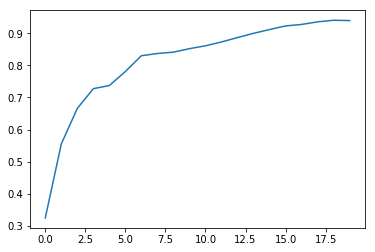

In [9]:
plt.plot(model_fitted.history["acc"])

利用互動觀察實際分析狀況

In [11]:
from ipywidgets import interact_manual

predict = model.predict_classes(x_test)
predict

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(x_dim), cmap='Greys')
    print(predict[測試編號])

interact_manual(test,測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

儲存

In [ ]:
model_json = model.to_json()
open('Data/model_7-1_HWP.json', 'w').write(model_json)
model.save_weights('Data/model_7-1_HWP_weights.h5')

## 加碼 - 更改 loss function

(觀看其他同學的作業後，想嘗試看看 categorical crossentropy 這個符合資料性質(categorical data) 的 loss function 是否能再一步改善狀況)

- L1: relu - 25, L2: relu - 16, Loss: categorical crossentropy, Opt: Adadelta(lr: 1)

In [15]:
model_alt = Sequential()
model_alt.add(Dense(25, input_dim=x_dim_re))
model_alt.add(Activation('relu'))
model_alt.add(Dense(16))
model_alt.add(Activation('relu'))
model_alt.add(Dense(10))
model_alt.add(Activation('softmax'))
model_alt.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=1), metrics=['accuracy'])
model_alt.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 25)                19625     
_________________________________________________________________
activation_22 (Activation)   (None, 25)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                416       
_________________________________________________________________
activation_23 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                170       
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 20,211
Trainable params: 20,211
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_alt_fitted = model_alt.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 1.8055 - acc: 0.4003
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 1.1985 - acc: 0.5566
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 1.0083 - acc: 0.6416
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.8571 - acc: 0.7116
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.7561 - acc: 0.7507
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.6719 - acc: 0.7961
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5873 - acc: 0.8364
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5132 - acc: 0.8663
Epoch 9/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4435 - acc: 0.8937
Epoch 10/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3851 - acc: 0.9145

- L1: relu - 81, L2: relu - 16, Loss: categorical crossentropy, Opt: Adadelta(lr: 1)

In [17]:
model_alt1 = Sequential()
model_alt1.add(Dense(81, input_dim=x_dim_re))
model_alt1.add(Activation('relu'))
model_alt1.add(Dense(16))
model_alt1.add(Activation('relu'))
model_alt1.add(Dense(10))
model_alt1.add(Activation('softmax'))
model_alt1.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=1), metrics=['accuracy'])
model_alt1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 81)                63585     
_________________________________________________________________
activation_25 (Activation)   (None, 81)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                1312      
_________________________________________________________________
activation_26 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                170       
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 65,067
Trainable params: 65,067
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_alt1_fitted = model_alt1.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 6.5963 - acc: 0.5815
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 2.9920 - acc: 0.8021
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 1.4307 - acc: 0.9001
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.1741 - acc: 0.9185
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.0051 - acc: 0.9290
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.9133 - acc: 0.9350
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.8592 - acc: 0.9397
Epoch 8/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.7917 - acc: 0.9442
Epoch 9/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.7537 - acc: 0.9467
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.6770 - acc: 0.9518

### 比較

先讀取上次成果

In [20]:
from keras.models import model_from_json

model = model_from_json(open('Data/model_7-1_HWP.json').read())
model.load_weights('Data/model_7-1_HWP_weights.h5')
model.compile(loss='mse', optimizer=Adadelta(lr=1))

然後才傻傻發現沒有存上次的歷史所以要重做...若要儲存歷史要這樣

In [ ]:
with open('Data/model_fitted_7-1_HWP.json', 'w') as file_pi:
    pickle.dump(model_fitted, file_pi)

然後我重新執行原始的模型(mse as loss function)，發現學習率不像第一次如此好，多執行幾次後也是一樣，直到大約反覆10次後才有與上次像童的正確率，看來要討論參數跟函數對模型的影響，可能還是需要透過 MC (Monte Carlo method) 多跑幾次才能分析的比較正確。